In [1]:
import xarray as xr
import talib as ta
from talib import abstract
import time
import pandas as pd
from pandas import DataFrame
from pandas import ExcelWriter
import pandas_datareader.data as wb
#from pandas_datareader import *
#from pandas_datareader import data, wb
#from pandas_datareader import Options
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import spearmanr
import sys
import datetime
import os
import time
import matplotlib.cbook as cbook
import csv
#import statsmodels.formula.api as sm
import seaborn as sns
import math as mth
from math import exp
import pylab
import pickle
from bs4 import BeautifulSoup
import re
import nltk
import string
import pprint
import sklearn
from sklearn import svm, preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import cross_validation
from sklearn import grid_search
from sklearn.cross_validation import cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing, sklearn.pipeline

import bokeh
from bokeh.plotting import *
from collections import OrderedDict
from bokeh.io import output_notebook
from bokeh.charts import defaults, vplot, hplot, Histogram
from bokeh.models import Toggle, BoxAnnotation, CustomJS
#from bokeh.layouts import layout
from bokeh import mpl
output_notebook()

import plotly
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.plotly as py
import plotly.tools as tls
import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pytz


import cufflinks as cf
import colorlover as cl
#Plotly API Information:(username='asl4af', api_key='7ut55tktdt')
plotly.tools.set_credentials_file(username='asl4af',api_key='tABgqtk34aaX6NkmKAmO')

#Make all charts public and set a global theme
cf.set_config_file(world_readable=True,theme='pearl')


tls.embed('https://plot.ly/~cufflinks/8')
init_notebook_mode(connected=False)


sns.set_style("white")
#sns.set_style("darkgrid")
#sns.set(style="darkgrid", palette="Set2")
#sns.set(style="darkgrid", context="paper", font="monospace")

%matplotlib inline
#mpl.style.use('ggplot')

#import Quandl
#import alphalens
import pyfolio as pf

from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

ModuleNotFoundError: No module named 'xarray'

In [2]:
cf.getThemes()

['polar', 'space', 'ggplot', 'pearl', 'solar', 'white', 'henanigans']

In [3]:
import pymssql
import pypyodbc
from os import getenv
import _mssql

# This code was recommended as a shortcut to iterate through some preliminary items that require a number of global variables
# to be imported from sqldf. It was in the documentation.
import pandasql
from pandasql import sqldf
pysqldf = lambda q: slqdf(q, globals())

In [4]:
server='qtsiqdbdv01'
user='Zander_Luke'
password='alpha'
database='xf'

server3='qtsiqdbdv02'
user3='Zander_Luke'
password3='zander'
database3='ul'

server2='SNLdb2'
user2='SNL\zanderl'
password2='@ZSL4af1!'
database2='master'

In [5]:
conn = _mssql.connect(server='qtsiqdbdv01', user='Zander_Luke', password='alpha', database='xf')
pysqlconn1 = pymssql.connect(server, user, password, database)
pysqlconn2 = pymssql.connect(server3, user3, password3, database3)
SNLConn1 = pymssql.connect(server=server2, user=user2, password=password2, database=database2)
cursor = pysqlconn1.cursor()
cursor = pysqlconn2.cursor()

To reformat our dataframe and merge the duplicate values onto the unique datetime index we'll use Pandas' pivot() function which will try to condense all non-unique values into an index of unique values. In addition, we can specify which elements in our dataframe that we'd like to make columns and which elements should be values.

We'll use the code shown here in the cell below to format our data before we return it from our function.

df = df.pivot(index='asofdate',columns='factorname',values='factorvalue')

In [9]:
def GetData():
    stmt = ("SELECT mth.asofdate, mth.factorid, mth.factorvalue, mth.gvkey, mth.universeId, f.factorname \
            FROM ciqAfValueMonthlyNA mth \
            inner join ciqAfFactor f \
            on mth.factorid = f.factorid \
            WHERE mth.GVKey in ('001004','231367','062304') \
            and mth.asOfDate BETWEEN '1/1/2000' and '11/20/2017' \
            ORDER BY mth.factorid")
    #df = pd.read_sql(stmt,pysqlconn1,parse_dates=True)
    #df = df.pivot(index='asofdate',columns='factorname',values='factorvalue')
    df = pd.read_sql(stmt,pysqlconn1,parse_dates=True,index_col=['gvkey','factorname','asofdate','factorvalue'])
    df.dropna(axis=1,inplace=True)
    
    return df

def GetDataFiltered():
    stmt = ("SELECT mth.asofdate, mth.factorvalue, mth.gvkey, f.factorname \
            FROM ciqAfValueMonthlyNA mth \
            inner join ciqAfFactor f \
            on mth.factorid = f.factorid \
            WHERE mth.GVKey in ('001004','231367','062304') \
            and mth.asOfDate BETWEEN '1/1/2000' and '11/20/2017' \
            ORDER BY mth.factorid")
    #df = pd.read_sql(stmt,pysqlconn1,parse_dates=True)
    #df = df.pivot(index='asofdate',columns='factorname',values='factorvalue')
    df = pd.read_sql(stmt,pysqlconn1,parse_dates=True,index_col=['factorname','gvkey','asofdate','factorvalue'])
    df.dropna(axis=1,inplace=True)
    
    return df

def GetData2():
    stmt = ("SELECT * FROM ciqAfFactor")
    #df = df.pivot(index='asofdate',columns='factorname',values='factorvalue')
    df = pd.read_sql(stmt,pysqlconn1)
    
    return df


def Get_AFL_MonthlyData():
    stmt = ("SELECT mth.asofdate, mth.factorid, mth.factorvalue, mth.gvkey, mth.universeId, f.factorname \
            FROM ciqAfValueMonthlyNA mth \
            inner join ciqAfFactor f \
            on mth.factorid = f.factorid \
            WHERE mth.asOfDate BETWEEN '1/1/2015' and '11/20/2017' \
            ORDER BY mth.factorid")
    #df = pd.read_sql(stmt,pysqlconn1,parse_dates=True)
    #df = df.pivot(index='asofdate',columns='factorname',values='factorvalue')
    #df = pd.read_sql(stmt,pysqlconn1,parse_dates=True,index_col=['gvkey','factorname','asofdate','factorvalue'])
    df = pd.read_sql(stmt,pysqlconn1,parse_dates=True,index_col='asofdate')
    df.dropna(axis=1,inplace=True)
    
    return df

def GetFactorData():
    stmt = ("SELECT mth.asofdate, mth.factorid, mth.factorvalue, mth.gvkey, mth.universeId, f.factorname \
            FROM ciqAfValueMonthlyNA mth \
            inner join ciqAfFactor f \
            on mth.factorid = f.factorid \
            WHERE mth.factorid in (39) \
            and mth.asOfDate BETWEEN '1/1/2000' and '11/20/2017' \
            and mth.factorvalue is not NULL \
            ORDER BY mth.asofdate")
    #df = pd.read_sql(stmt,pysqlconn1,parse_dates=True)
    #df = df.pivot(index='asofdate',columns='factorname',values='factorvalue')
    df = pd.read_sql(stmt,pysqlconn1,parse_dates=True,index_col='asofdate',columns='factorvalue')
    df.dropna(axis=1,inplace=True)
    
    return df

In [ ]:
%%time
df1 = GetData()
df1_f = GetDataFiltered()
AFL_Ref = GetData2()
AFL1 = Get_AFL_MonthlyData()

In [10]:
%%time
F1 = GetFactorData()

Wall time: 45.8 s


In [11]:
import h5py
file1 = h5py.File("FactorData1.hdf5","w")

h5py documentation  
http://docs.h5py.org/en/latest/quick.html

In [14]:
AFL_Ref

,factorId,factorName,factorAbbreviation,styleId,factorDefinition,factorRelativeId,parentFactorId
0,2,Return on Invested Capital,ROIC,6,This factor is the ratio of trailing four quar...,1001,NaN
1,4,Return on Equity,ROE,6,The ratio of trailing four quarter income befo...,1001,NaN
2,9,Return on Assets,ROA,6,ROA is the ratio of trailing four quarter afte...,1001,NaN
3,11,Cash Flow Return on Invested Capital,CFROIC,6,The factor measures a ratio of trailing four q...,1001,NaN
4,12,Debt to Assets Ratio,DA,6,The ratio of long term and short term debt to ...,1001,NaN
5,13,Long Term Debt to Equity Ratio,LTDE,6,The ratio of long term debt to total sharehold...,1001,NaN
6,14,Capital Acquisition Ratio,CapAcqRatio,6,The factor is a ratio of trailing four quarte...,1001,NaN
7,15,Interest Coverage Ratio,IntCovRatio,6,The ratio of operating income after depreciati...,1001,NaN
8,18,1Y Chg in Shares Outstanding,ShareChg,6,The percentage change in common shares outstan...,1001,NaN
9,21,1Y Chg in Stock Buybacks,BuyBackChg,6,The factor is a percentage change from a year ...,1001,NaN


In [12]:
F1.head()
F1.shape

,factorid,factorvalue,gvkey,universeId,factorname
asofdate,,,,,
2000-01-31,39,0.304101,001036,2110,12M Realized Price Volatility
2000-01-31,39,0.432765,001081,2110,12M Realized Price Volatility
2000-01-31,39,0.412914,001096,2110,12M Realized Price Volatility
2000-01-31,39,0.514032,001186,2110,12M Realized Price Volatility
2000-01-31,39,0.380935,001189,2110,12M Realized Price Volatility


(3171648, 5)

In [14]:
F1.drop(['factorid', 'factorname','universeId'],axis=0,inplace=True)

In [28]:
F1_t = F1.iloc[::,1].T

In [26]:
F1_t.head()
F1_t.shape

factorname                  asofdate  
Return on Invested Capital  2016-01-31    0.127794
                            2016-01-31    0.153751
                            2016-01-31    0.077047
                            2016-01-31    0.340885
                            2016-01-31    0.015547
Name: factorvalue, dtype: float64

(441369L,)

In [35]:
ROIC = F1_t.loc['Return on Invested Capital']
MPR = F1_t.loc['1M Price Reversal']

In [40]:
ROIC.shape
MPR.shape

(164521L,)

(276848L,)

In [13]:
#dftest = pd.merge(ROIC,MPR,how='inner')

In [36]:
df1.head()
df1_f.head()

factorid  universeId
gvkey  factorname                 asofdate   factorvalue                      
001004 Return on Invested Capital 2000-01-31 0.112534            2        2109
                                  2000-02-29 0.112534            2        2109
                                  2000-03-31 0.112534            2        2109
                                  2000-04-30 0.113815            2        2109
                                  2000-05-31 0.113815            2        2109

Empty DataFrame
Columns: []
Index: [(001004, Return on Invested Capital, 2000-01-31 00:00:00, 0.112534), (001004, Return on Invested Capital, 2000-02-29 00:00:00, 0.112534), (001004, Return on Invested Capital, 2000-03-31 00:00:00, 0.112534), (001004, Return on Invested Capital, 2000-04-30 00:00:00, 0.113815), (001004, Return on Invested Capital, 2000-05-31 00:00:00, 0.113815)]

In [18]:
df_stats = df1.describe()
df_stats

,factorid,universeId
count,228640.000000,228640.0
mean,517.234412,2109.0
std,335.170227,0.0
min,2.000000,2109.0
25%,215.000000,2109.0
50%,507.000000,2109.0
75%,837.000000,2109.0
max,1201.000000,2109.0


In [20]:
#df_stats.iloc[1:]

In [23]:
df1.shape
df_stats.index

(228640, 2)

Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')

In [24]:
df_stats.iloc[1:].iplot(kind='bar')

In [28]:
for col in df1.columns:
    print(''.join(col))

factorid
universeId


In [31]:
df_corr = df1.corr(method='pearson', min_periods=1)

In [32]:
df_corr

,factorid,universeId
factorid,1.0,NaN
universeId,NaN,NaN


We can use the .iloc[] slicing method to specify how many or specifically which df[rows,columns] we want to use as seen below.

In [33]:
df1.iloc[:7,:5]

factorid  universeId
gvkey  factorname                 asofdate   factorvalue                      
001004 Return on Invested Capital 2000-01-31 0.112534            2        2109
                                  2000-02-29 0.112534            2        2109
                                  2000-03-31 0.112534            2        2109
                                  2000-04-30 0.113815            2        2109
                                  2000-05-31 0.113815            2        2109
                                  2000-06-30 0.113815            2        2109
                                  2000-07-31 0.113815            2        2109

In [34]:
#df1.iloc[:,5:10].iplot(theme='space')

In [37]:
df1.iloc[:,12:14].iplot(kind='histogram',theme='space',bins=100)

PlotlyEmptyDataError: Empty data list found. Make sure that you populated the list of data objects you're sending and try again.
Questions? support@plot.ly

In [18]:
df1.iloc[:,15:19].iplot(kind='histogram',theme='white',bins=100)

In [19]:
df_corr.iloc[:10,:10].iplot(kind='heatmap')

In [20]:
df_corr.iloc[10:20,10:20].iplot(kind='heatmap')

In [117]:
df_corr.iloc[:2,:3]

factorname,10 Day MACD Trend,12 month Relative Price Strength,12-Quarter Trendline in Trailing 12-Month Cash Flows
factorname,,,
10 Day MACD Trend,1.000000,-0.121161,-0.068766
12 month Relative Price Strength,-0.121161,1.000000,0.011956


In [119]:
df_corr['12 month Relative Price Strength'].sort_values(ascending=False)

factorname
12 month Relative Price Strength                                            1.000000
Volatility adjusted 12M return                                              0.871853
Slope of 52W Price Trend                                                    0.640898
12M - 1M Price Momentum                                                     0.639743
Ind Grp Rel 12M - 1M Price Momentum                                         0.582878
39W Lagged Return                                                           0.549514
180D Price TStat                                                            0.543106
50 Day to 200 Day Stock Price                                               0.521667
52-Week Volume Price Trend with 20-Day Lag                                  0.521320
15/36 Week Price Ratio                                                      0.504098
Sharpe Ratio                                                                0.486789
Closing Price to 52 Week High                         

In [83]:
df2 = df1
y = df2['ETF_Count'].shift(-1)
y.fillna(value=-99999,inplace=True)
x = df2.drop(['ETF_Count'],axis=1)
feature_names = list(x.columns)
#x_df = df3.drop(['t+1'],axis=0,inplace=True)
#df3.head(2)

In [84]:
y.shape
x.shape

(22L,)

(22, 7)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = preprocessing.scale(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

RFR = RandomForestRegressor(n_jobs=-1).fit(X_train, y_train)
KNNR = KNeighborsRegressor(n_jobs=-1).fit(X_train, y_train)
MLPR = MLPRegressor().fit(X_train, y_train)
DTR = DecisionTreeRegressor().fit(X_train, y_train)
SVR_model = SVR(kernel='rbf',degree=3,gamma='auto').fit(X_train, y_train)

In [87]:
"RFR Test set score: {:}".format(RFR.score(X_test,y_test))
"KNNR Test set score: {:}".format(KNNR.score(X_test,y_test))
"MLPR Test set score: {:}".format(MLPR.score(X_test,y_test))
"DTR Test set score: {:}".format(DTR.score(X_test,y_test))
"SVR_model Test set score: {:}".format(SVR_model.score(X_test,y_test))

'RFR Test set score: -0.128586632365'

'KNNR Test set score: -0.129140009957'

'MLPR Test set score: -0.108785655208'

'DTR Test set score: -0.138991451904'

'SVR_model Test set score: -0.110812872704'

In [88]:
feature_importance_RFR = sorted(zip(map(lambda x: round(x,4),RFR.feature_importances_),feature_names),reverse=True)

In [89]:
feature_importance_RFR

[(0.5404, 'AvgHourlyEarnings'),
 (0.308, 'TenYear_Yield'),
 (0.1214, 'UnemployRate'),
 (0.0231, 'CoreCPIChg'),
 (0.0048, 'SP500_TR'),
 (0.0014, 'PslSvgsRate'),
 (0.0009, 'GDP_Growth')]

We can use the below code to generate an array of prdicted values that is the same length as the input y variable using cross validation.

from sklearn.model_selection import cross_val_predict


pred = cross_val_predict(RFR,X,y)

In [90]:
from sklearn.model_selection import cross_val_predict
pred_RFR = cross_val_predict(RFR,X,y)
pred_KNNR = cross_val_predict(KNNR,X,y)
pred_MLPR = cross_val_predict(MLPR,X,y)
pred_DTR = cross_val_predict(DTR,X,y)
pred_SVR = cross_val_predict(SVR_model,X,y)

In [91]:
pred_RFR.shape
pred_KNNR.shape
pred_MLPR.shape
X.shape

(22L,)

(22L,)

(22L,)

(22L, 7L)

In [92]:
df2['pred_RFR'] = pred_RFR
df2['pred_KNNR'] = pred_KNNR
df2['pred_MLPR'] = pred_MLPR
df2['pred_DTR'] = pred_DTR
df2['pred_SVR'] = pred_SVR

In [2]:
df2.head(5)

NameError: name 'df2' is not defined

In [76]:
df2[['ETF_Count','pred_RFR']].iplot(kind='scatter')

In [94]:
df2[['ETF_Count','pred_SVR']].iplot(kind='scatter')

In [39]:
df3[['priceClose','pred_KNNR']].iplot(kind='scatter')

NameError: name 'df3' is not defined

In [31]:
#pd.isnull(X).sum()
#X

In [45]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

('TRAIN:', array([0, 1, 2, 3, 4, 5, 6], dtype=int64), 'TEST', array([ 7,  8,  9, 10, 11], dtype=int64))
('TRAIN:', array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64), 'TEST', array([12, 13, 14, 15, 16], dtype=int64))
('TRAIN:', array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16], dtype=int64), 'TEST', array([17, 18, 19, 20, 21], dtype=int64))


In [46]:
pd.isnull(X_train).sum()
X_train.max()

pd.isnull(y_train).sum()
y_train.max()

y_train.dropna(axis=0,inplace=True)

0

2.2576174717296049

17

nan

In [38]:
#RFR.fit(X_train, y_train)

In [50]:
"Test set score: {:}".format(RFR.score(X_test,y_test))

'Test set score: -0.00427457528406'

Later on we'll use these to build a pipeline. But, for now we'll keep things a little more simple and look at some individual items.

from sklearn.pipeline import Pipeline


pipe = Pipeline([("PipeLine1", preprocessing,"RFR",RandomForestRegressor())])

In [51]:
training_accuracy = []
test_accuracy = []

training_accuracy.append(RFR.score(X_train,y_train))
test_accuracy.append(RFR.score(X_test,y_test))

In [52]:
training_accuracy
test_accuracy

[0.9979559872843059]

[-0.0042745752840591678]

Interesting note regarding the below code. If you have Jupyter Notebook's display features turned on and you include a line of code with the dataframe's name to get the values to print in the Jupyter Notebook's formatted table, it will return a formatted table of the results from the below for loop for every iteration and the stack them nicely within the same output block. 

This could be very useful for light debugging.

In [65]:
dataframe = DataFrame()
for i in range(12,0,-1):
    dataframe['t'] = df2['priceClose']
    dataframe['t-'+str(i)] = df2['priceClose'].shift(i)

In [67]:
dataframe[13:].head(5)

,t,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
pricingDate,,,,,,,,,,,,,
1993-01-21,18.1875,20.000,20.125,20.125,19.500,19.125,19.1250,19.1250,18.7500,18.6250,18.8125,18.5000,18.3750
1993-01-22,18.0625,20.125,20.125,19.500,19.125,19.125,19.1250,18.7500,18.6250,18.8125,18.5000,18.3750,18.1875
1993-01-25,18.4375,20.125,19.500,19.125,19.125,19.125,18.7500,18.6250,18.8125,18.5000,18.3750,18.1875,18.0625
1993-01-26,17.7500,19.500,19.125,19.125,19.125,18.750,18.6250,18.8125,18.5000,18.3750,18.1875,18.0625,18.4375
1993-01-27,17.3125,19.125,19.125,19.125,18.750,18.625,18.8125,18.5000,18.3750,18.1875,18.0625,18.4375,17.7500


We can now return all the values of the dataframe object and skip the NAs with the below (and/or the above) code. 

NOTE: The NAs are still in the dataframe object, we haven't removed them. We're simply slicing the dataframe object and excluding them in the slice.

In [68]:
#dataframe[13:]

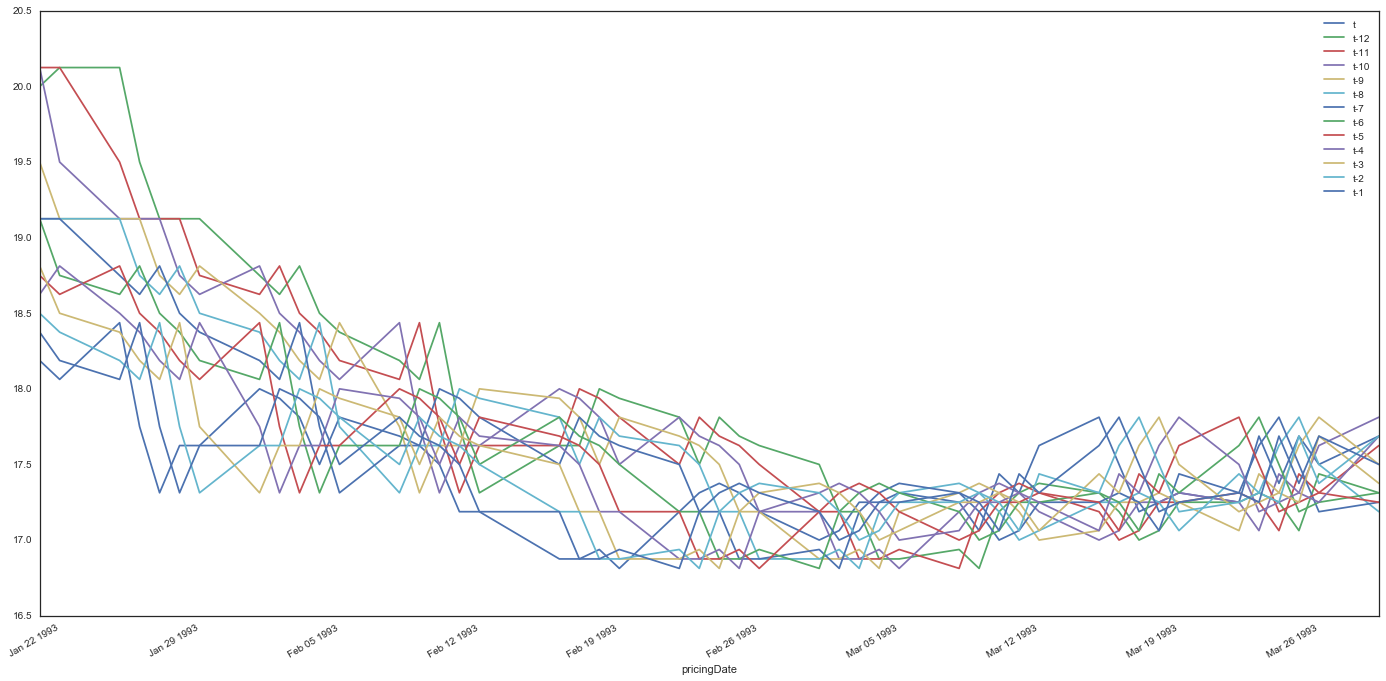

In [73]:
f, ax = plt.subplots(figsize=(24,12))

dataframe.iloc[13:60,:].plot(kind='line',ax=ax)

In [21]:
def GetData2():
    stmt = ("SELECT mth.asofdate, mth.factorid, mth.factorvalue, mth.gvkey, mth.universeId, f.factorname \
            FROM ciqAfValueMonthlyNA mth \
            inner join ciqAfFactor f \
            on mth.factorid = f.factorid \
            WHERE mth.GVKey in ('001004','001045','001009','001011','001013','001078','001082','001094','001098','001099') \
            and mth.asOfDate BETWEEN '1/1/2000' and '6/14/2017' \
            ORDER BY mth.factorid")
    df = pd.read_sql(stmt,pysqlconn1,parse_dates=True,index_col=['gvkey','factorname','asofdate'])
    #df = df.pivot(index='gvkey',columns='factorname',values='factorvalue')
    #df.dropna(axis=1,inplace=True)
    #df2 = df.to_dict(orient='dict')
    #df2 = {}
    
    return df

In [22]:
%%time
df_2 = GetData2()

Wall time: 2min 11s


In [23]:
#df123.head()
df_2.head()

factorid  factorvalue  \
gvkey  factorname                 asofdate                            
001004 Return on Invested Capital 2000-01-31         2     0.112534   
                                  2000-02-29         2     0.112534   
                                  2000-03-31         2     0.112534   
                                  2000-04-30         2     0.113815   
                                  2000-05-31         2     0.113815   

                                              universeId  
gvkey  factorname                 asofdate                
001004 Return on Invested Capital 2000-01-31        2109  
                                  2000-02-29        2109  
                                  2000-03-31        2109  
                                  2000-04-30        2109  
                                  2000-05-31        2109

In [40]:
df_2.loc['001004'].head()

factorid  factorvalue  universeId
factorname                 asofdate                                     
Return on Invested Capital 2000-01-31         2     0.112534        2109
                           2000-02-29         2     0.112534        2109
                           2000-03-31         2     0.112534        2109
                           2000-04-30         2     0.113815        2109
                           2000-05-31         2     0.113815        2109

In [25]:
def GetData2():
    stmt = ("SELECT mth.asofdate, mth.factorvalue, mth.gvkey, f.factorname \
            FROM ciqAfValueMonthlyNA mth \
            inner join ciqAfFactor f \
            on mth.factorid = f.factorid \
            WHERE mth.GVKey in ('001004','001045','001009','001011','001013','001078','001082','001094','001098','001099') \
            and mth.asOfDate BETWEEN '1/1/2000' and '6/14/2017' \
            ORDER BY mth.factorid")
    df = pd.read_sql(stmt,pysqlconn1,parse_dates=True,index_col=['factorname','gvkey','asofdate'])
    #df = df.pivot(index='gvkey',columns='factorname',values='factorvalue')
    #df.dropna(axis=1,inplace=True)
    #df2 = df.to_dict(orient='dict')
    #df2 = {}
    
    return df

In [26]:
%%time
df_3 = GetData2()

Wall time: 2min 20s


In [27]:
df_3.head()

factorvalue
factorname                 gvkey  asofdate               
Return on Invested Capital 001004 2000-01-31     0.112534
                                  2000-02-29     0.112534
                                  2000-03-31     0.112534
                                  2000-04-30     0.113815
                                  2000-05-31     0.113815

In [57]:
df_3.loc['Volatility adjusted 12M return'].head(5)

factorvalue
gvkey  asofdate               
001004 2000-01-31    -2.001600
       2000-02-29    -3.224280
       2000-03-31     5.466660
       2000-04-30     0.213758
       2000-05-31    -0.799598

In [51]:
df_3.loc['Return on Invested Capital'].iplot(kind='histogram',theme='white')

In [49]:
df_3.loc['Sharpe Ratio'].iplot(kind='histogram',theme='white')

In [75]:
#df2 = df1
y = df_3.loc['Volatility adjusted 12M return'].shift(-1)
y.fillna(value=-99999,inplace=True)
#x = df_3.loc['Volatility adjusted 12M return'].drop(['Volatility adjusted 12M return'],axis=1)
X = df_3
feature_names = list(X.columns)

In [76]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

('TRAIN:', array([     0,      1,      2, ..., 162732, 162733, 162734]), 'TEST', array([162735, 162736, 162737, ..., 325466, 325467, 325468]))


IndexError: indices are out-of-bounds